In [17]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [18]:
pkmndata = pd.read_csv('train.csv')
pkmndata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
arr = ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']
numDF = pd.DataFrame(pkmndata[arr])
#numDF is the dataframe of the specific columns

In [30]:

print("Data type : ", type(numDF))
print("Data dims : ", numDF.size)

#total number of entries: 5840/4 = 1860

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  5840


In [32]:
numDF.describe()


In [46]:
q1,q3 = numDF.quantile(0.25),numDF.quantile(0.75)
#np.percentile(numDF,[25,75])
iqr = q3-q1
print(q1)
print(q3)
((numDF < (q1 - 1.5 * iqr)) | (numDF > (q3 + 1.5 * iqr ))).sum()

#number of NICE outliers: 69 LotArea

LotArea        7553.50
GrLivArea      1129.50
TotalBsmtSF     795.75
GarageArea      334.50
Name: 0.25, dtype: float64
LotArea        11601.50
GrLivArea       1776.75
TotalBsmtSF     1298.25
GarageArea       576.00
Name: 0.75, dtype: float64


LotArea        69
GrLivArea      31
TotalBsmtSF    61
GarageArea     21
dtype: int64

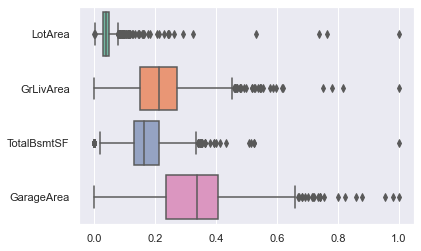

In [74]:
#f = plt.figure(figsize=(16, 8))
#sb.boxplot(data = numDF, orient = "h")
#normalized_df=(numDF-numDF.mean())/numDF.std()
normalized_df=(numDF-numDF.min())/(numDF.max()-numDF.min())
#outliers : 4
iris = sb.load_dataset("iris")
ax = sb.boxplot(data=normalized_df, orient="h", palette="Set2")

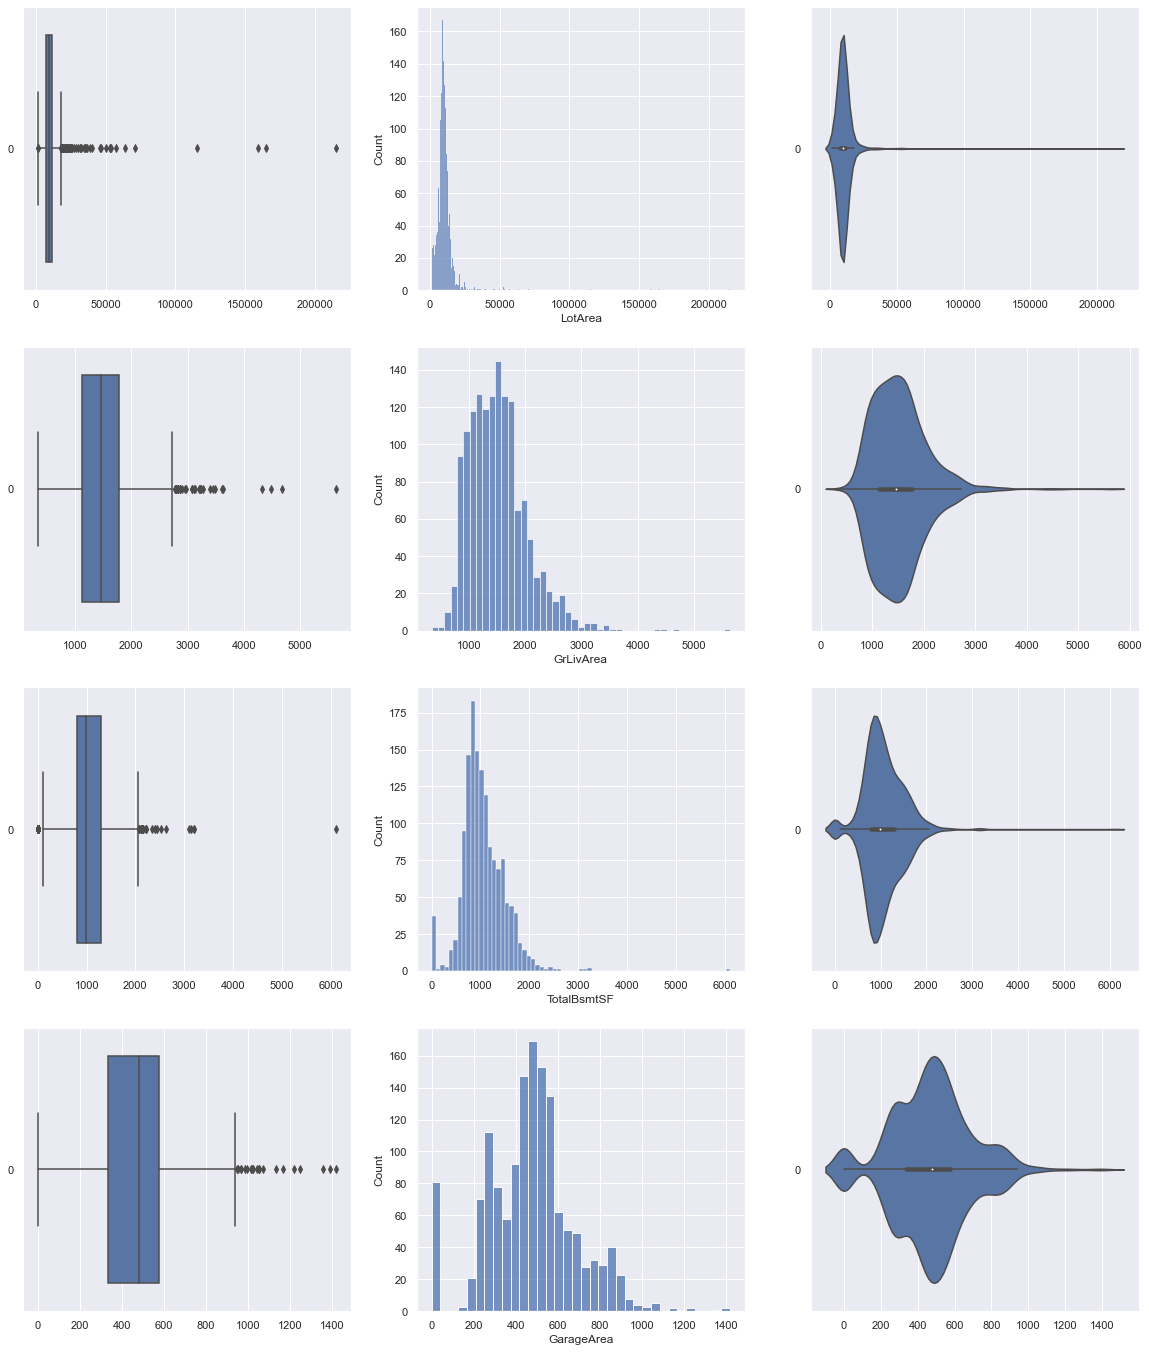

In [50]:
#Q1b) Skewness
f, axes = plt.subplots(4, 3, figsize=(20, 24))
#scale

count = 0
for var in numDF:
    sb.boxplot(data = numDF[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numDF[var], ax = axes[count,1])
    sb.violinplot(data = numDF[var], orient = "h", ax = axes[count,2])
    count += 1

In [49]:
numDF.skew(axis = 0, skipna = True)
#lotArea, skew positive as graph leaning to the left
#search positive skew on google

LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
dtype: float64

In [51]:
numDF.median()
numDF.mean()

LotArea        10516.828082
GrLivArea       1515.463699
TotalBsmtSF     1057.429452
GarageArea       472.980137
dtype: float64

In [55]:
#1c)
arr = ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea','SalePrice']
numDF2 = pd.DataFrame(pkmndata[arr])
numDF2.corr()
#clearly see that GarageArea and GrLivArea are the two strongly corr factors.

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
LotArea,1.000000,0.263116,0.260833,0.180403,0.263843
GrLivArea,0.263116,1.000000,0.454868,0.468997,0.708624
TotalBsmtSF,0.260833,0.454868,1.000000,0.486665,0.613581
GarageArea,0.180403,0.468997,0.486665,1.000000,0.623431
SalePrice,0.263843,0.708624,0.613581,0.623431,1.000000


In [67]:
######################################################
#2a)

arr2 = ['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']
numDF3 = pd.DataFrame(pkmndata[arr2])
numDF3.corr()

,MSSubClass,OverallQual
MSSubClass,1.000000,0.032628
OverallQual,0.032628,1.000000


In [83]:
numDF3.dtypes
numDF3
counts = numDF3.nunique()
print(counts)
for i in numDF3:
    print(numDF3[i].value_counts())
    print('\n')
    #neighbourhood has the largest number of unique levels

MSSubClass      15
Neighborhood    25
BldgType         5
OverallQual     10
dtype: int64
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64




Text(0.5, 1.0, 'Plot lmao')

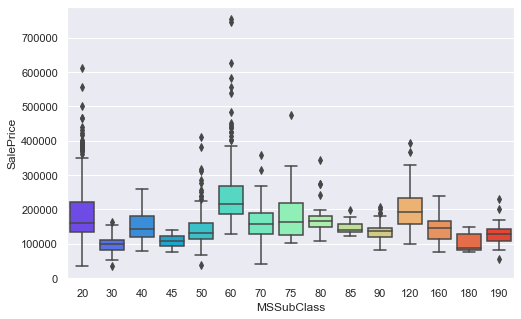

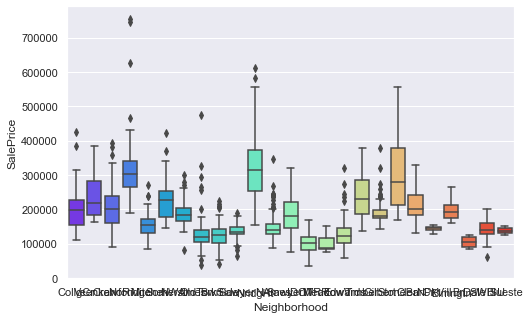

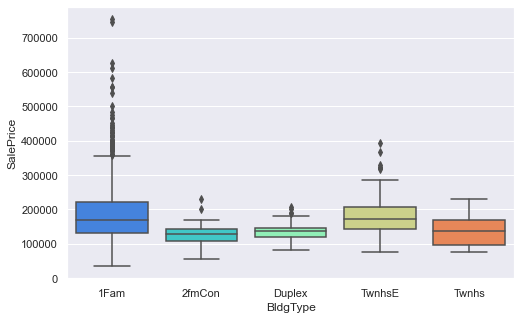

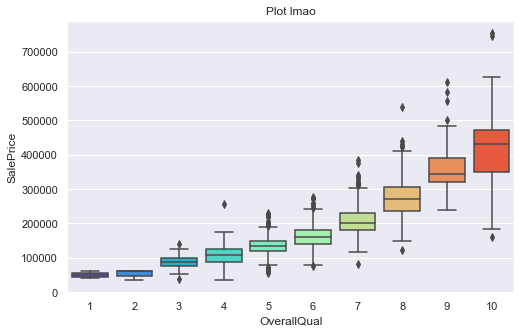

In [102]:
arr2 = ['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual','SalePrice']
arr3 = ['MSSubClass','SalePrice']
arr4 = ['Neighborhood','SalePrice']
arr5 = ['BldgType','SalePrice']
arr6 = ['OverallQual','SalePrice']
arr7 = [arr3,arr4,arr5,arr6]
for i in arr7:
    numDF4 = pd.DataFrame(pkmndata[i])
    plt.figure(figsize=(8,5))
    sb.boxplot(x= f'{i[0]}', y =f'{i[1]}',data=numDF4, palette='rainbow')
#ax = sb.stripplot(x="SalePrice", y="MSSubClass", data=numDF4)
#ax = sb.boxenplot(x="SalePrice", y="OverallQual", data=numDF4)

#sb.boxplot(x='OverallQual',y='SalePrice',data=numDF4, palette='rainbow')
plt.title("Plot lmao")

#https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec


#from the graph Overall quality and Neighborhood

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  5840
0       Attchd
1       Attchd
2       Attchd
3       Detchd
4       Attchd
         ...  
1455    Attchd
1456    Attchd
1457    Attchd
1458    Attchd
1459    Attchd
Name: GarageType, Length: 1460, dtype: object
0       RFn
1       RFn
2       RFn
3       Unf
4       RFn
       ... 
1455    RFn
1456    Unf
1457    RFn
1458    Unf
1459    Fin
Name: GarageFinish, Length: 1460, dtype: object
0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageQual, Length: 1460, dtype: object
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


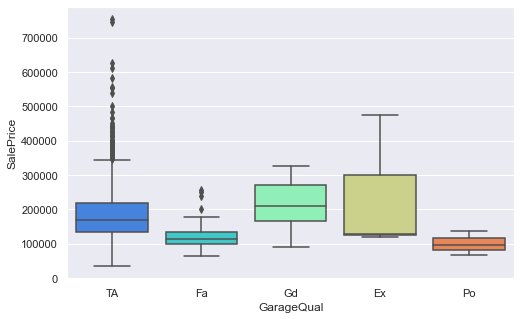

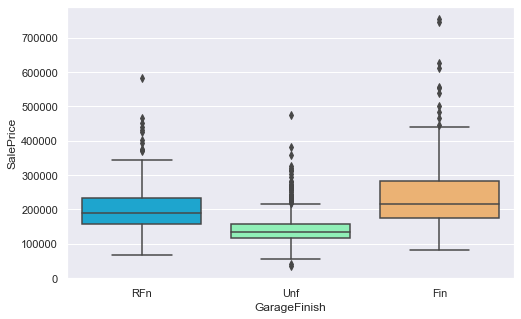

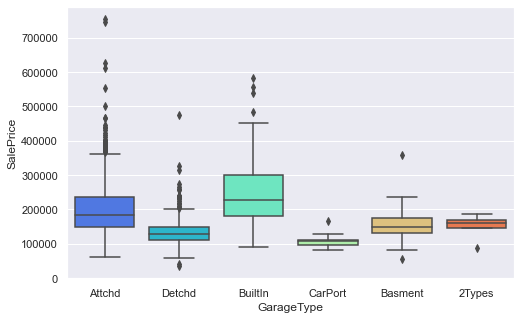

In [115]:
#3a Possible factors
#GarageQual GarageFinish GarageType

arr8 = ['GarageQual','SalePrice']
arr9 = ['GarageFinish','SalePrice']
arr10 = ['GarageType','SalePrice']
arr11 = [arr8,arr9,arr10]
arr12 = ['GarageType','GarageFinish','GarageQual','SalePrice']

numDF2 = pd.DataFrame(pkmndata[arr12])
print("Data type : ", type(numDF2))
print("Data dims : ", numDF2.size)

for i in numDF2:
    if i == 'NA':
        i = lmao
    print(numDF2[i])


for i in arr11:
    numDF4 = pd.DataFrame(pkmndata[i])
    plt.figure(figsize=(8,5))
    sb.boxplot(x= f'{i[0]}', y =f'{i[1]}',data=numDF4, palette='rainbow')